- Taxi trip data.csv : 관련 여행 데이터와 픽업 및 하차 구역
- Taxi zone geo.csv : 픽업 구역 영역의 경도 및 위도 좌표 포함

- 목표 : 가격 예측 회귀 모델 작성

- 데이터 링크: https://www.kaggle.com/datasets/neilclack/nyc-taxi-trip-data-google-public-data?select=taxi_zone_geo.csv

In [45]:
import numpy as np
import pandas as pd
import matplotlib as plt

In [46]:
trip_df = pd.read_csv('/content/drive/MyDrive/KNU/06. 석사1학기/(01-01)Kaggle/Taxi/taxi_trip_data.csv')
zone_df = pd.read_csv('/content/drive/MyDrive/KNU/06. 석사1학기/(01-01)Kaggle/Taxi/taxi_zone_geo.csv')

In [47]:
trip_df.head()

,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,trip_distance,rate_code,store_and_fwd_flag,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,imp_surcharge,total_amount,pickup_location_id,dropoff_location_id
0,2,2018-03-29 13:37:13,2018-03-29 14:17:01,1,18.15,3,N,1,70.0,0.0,0.0,16.16,10.50,0.3,96.96,161,1
1,2,2018-03-29 13:37:18,2018-03-29 14:15:33,1,4.59,1,N,1,25.0,0.0,0.5,5.16,0.00,0.3,30.96,13,230
2,2,2018-03-29 13:26:57,2018-03-29 13:28:03,1,0.30,1,N,1,3.0,0.0,0.5,0.76,0.00,0.3,4.56,231,231
3,2,2018-03-29 13:07:48,2018-03-29 14:03:05,2,16.97,1,N,1,49.5,0.0,0.5,5.61,5.76,0.3,61.67,231,138
4,2,2018-03-29 14:19:11,2018-03-29 15:19:59,5,14.45,1,N,1,45.5,0.0,0.5,10.41,5.76,0.3,62.47,87,138


- dropoff datetime이랑 pickup datetime 두개의 시간차를 구하기
- 승객 수 파악
- trip distance 범위 알아보기
- fare amount: 요금 
- total amount : 전체 요금

In [48]:
zone_df.head()

,zone_id,zone_name,borough,zone_geom
0,1,Newark Airport,EWR,"POLYGON((-74.1856319999999 40.6916479999999, -..."
1,3,Allerton/Pelham Gardens,Bronx,"POLYGON((-73.848596761 40.8716707849999, -73.8..."
2,18,Bedford Park,Bronx,"POLYGON((-73.8844286139999 40.8668003789999, -..."
3,20,Belmont,Bronx,"POLYGON((-73.8839239579998 40.8644177609999, -..."
4,31,Bronx Park,Bronx,"POLYGON((-73.8710017319999 40.8572767429999, -..."


In [49]:
trip_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000000 entries, 0 to 9999999
Data columns (total 17 columns):
 #   Column               Dtype  
---  ------               -----  
 0   vendor_id            int64  
 1   pickup_datetime      object 
 2   dropoff_datetime     object 
 3   passenger_count      int64  
 4   trip_distance        float64
 5   rate_code            int64  
 6   store_and_fwd_flag   object 
 7   payment_type         int64  
 8   fare_amount          float64
 9   extra                float64
 10  mta_tax              float64
 11  tip_amount           float64
 12  tolls_amount         float64
 13  imp_surcharge        float64
 14  total_amount         float64
 15  pickup_location_id   int64  
 16  dropoff_location_id  int64  
dtypes: float64(8), int64(6), object(3)
memory usage: 1.3+ GB


In [50]:
zone_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 263 entries, 0 to 262
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   zone_id    263 non-null    int64 
 1   zone_name  263 non-null    object
 2   borough    263 non-null    object
 3   zone_geom  263 non-null    object
dtypes: int64(1), object(3)
memory usage: 8.3+ KB


- 'total_amount' - 'fare_amount' 구하기
- 전체 금액에서 요금 금액을 뺀 금액, 팁 금액이랑 통행료 금액 알아보기

In [51]:
trip_df['total-fare amount']=trip_df['total_amount']-trip_df['fare_amount']

In [52]:
trip_df.head()

,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,trip_distance,rate_code,store_and_fwd_flag,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,imp_surcharge,total_amount,pickup_location_id,dropoff_location_id,total-fare amount
0,2,2018-03-29 13:37:13,2018-03-29 14:17:01,1,18.15,3,N,1,70.0,0.0,0.0,16.16,10.50,0.3,96.96,161,1,26.96
1,2,2018-03-29 13:37:18,2018-03-29 14:15:33,1,4.59,1,N,1,25.0,0.0,0.5,5.16,0.00,0.3,30.96,13,230,5.96
2,2,2018-03-29 13:26:57,2018-03-29 13:28:03,1,0.30,1,N,1,3.0,0.0,0.5,0.76,0.00,0.3,4.56,231,231,1.56
3,2,2018-03-29 13:07:48,2018-03-29 14:03:05,2,16.97,1,N,1,49.5,0.0,0.5,5.61,5.76,0.3,61.67,231,138,12.17
4,2,2018-03-29 14:19:11,2018-03-29 15:19:59,5,14.45,1,N,1,45.5,0.0,0.5,10.41,5.76,0.3,62.47,87,138,16.97


In [53]:
# 팁+통행료 max
trip_df['total-fare amount'].max()

918.55

In [54]:
# 팁+통행료 min
trip_df['total-fare amount'].min()

-328.98

(-)값이 있다? 이건 전체 금액이 운행요금+팁요금+통행료 값이 아니라는 건가?

- 결측치 확인
- 결측치 없음

In [55]:
trip_df.isnull().sum()

vendor_id              0
pickup_datetime        0
dropoff_datetime       0
passenger_count        0
trip_distance          0
rate_code              0
store_and_fwd_flag     0
payment_type           0
fare_amount            0
extra                  0
mta_tax                0
tip_amount             0
tolls_amount           0
imp_surcharge          0
total_amount           0
pickup_location_id     0
dropoff_location_id    0
total-fare amount      0
dtype: int64

In [56]:
zone_df.isnull().sum()

zone_id      0
zone_name    0
borough      0
zone_geom    0
dtype: int64

- trip distance가 있으므로 dtatetime 날려도 됨

In [57]:
trip_df = trip_df.drop(columns ='pickup_datetime',axis=1)
trip_df = trip_df.drop(columns ='dropoff_datetime',axis=1)

In [58]:
trip_df

,vendor_id,passenger_count,trip_distance,rate_code,store_and_fwd_flag,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,imp_surcharge,total_amount,pickup_location_id,dropoff_location_id,total-fare amount
0,2,1,18.15,3,N,1,70.0,0.0,0.0,16.16,10.50,0.3,96.96,161,1,26.96
1,2,1,4.59,1,N,1,25.0,0.0,0.5,5.16,0.00,0.3,30.96,13,230,5.96
2,2,1,0.30,1,N,1,3.0,0.0,0.5,0.76,0.00,0.3,4.56,231,231,1.56
3,2,2,16.97,1,N,1,49.5,0.0,0.5,5.61,5.76,0.3,61.67,231,138,12.17
4,2,5,14.45,1,N,1,45.5,0.0,0.5,10.41,5.76,0.3,62.47,87,138,16.97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9999995,2,1,3.45,1,N,1,27.5,0.0,0.5,5.66,0.00,0.3,33.96,211,229,6.46
9999996,1,1,6.80,1,N,1,30.0,0.0,0.5,4.62,0.00,0.3,35.42,79,238,5.42
9999997,2,2,8.46,1,N,1,35.0,0.0,0.5,8.31,5.76,0.3,49.87,138,162,14.87
9999998,2,1,14.43,1,N,1,52.5,0.0,0.5,11.81,5.76,0.3,70.87,13,138,18.37


- 픽업 위치와 하차 위치에 따른 손님 수 파악해보기
- 손님 수에 따른 요금 변화는 없음.

In [59]:
trip_df['passenger_count'].value_counts()

1    7060027
2    1507882
5     459585
3     417031
6     270380
4     194565
0      90004
7        207
8        175
9        144
Name: passenger_count, dtype: int64

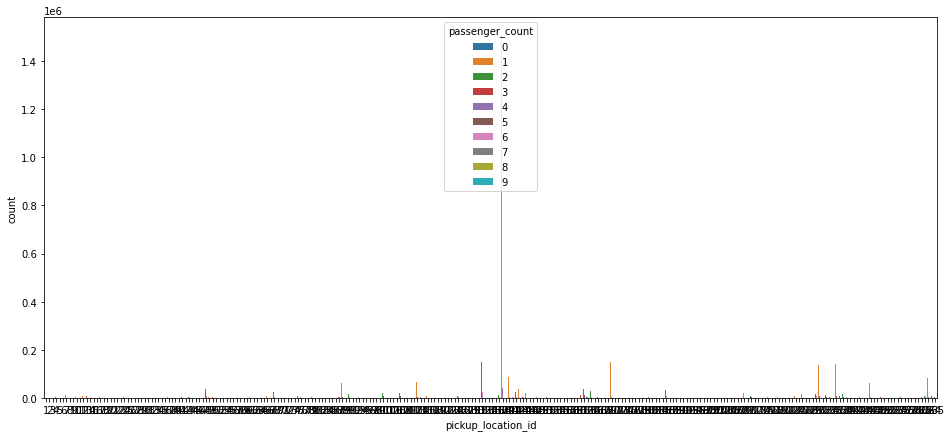

In [89]:
import seaborn as sns
from matplotlib import pyplot

fig, ax = pyplot.subplots(figsize=(16,7))
#픽업 위치
sns.countplot(x='pickup_location_id', hue='passenger_count', data=trip_df)

중간에 이상하게 큰값있음.
 이건 후에 생각 좀 하고 처리.

In [61]:
#trip_df = trip_df.drop(columns ='passenger_count',axis=1)

In [62]:
trip_df

,vendor_id,passenger_count,trip_distance,rate_code,store_and_fwd_flag,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,imp_surcharge,total_amount,pickup_location_id,dropoff_location_id,total-fare amount
0,2,1,18.15,3,N,1,70.0,0.0,0.0,16.16,10.50,0.3,96.96,161,1,26.96
1,2,1,4.59,1,N,1,25.0,0.0,0.5,5.16,0.00,0.3,30.96,13,230,5.96
2,2,1,0.30,1,N,1,3.0,0.0,0.5,0.76,0.00,0.3,4.56,231,231,1.56
3,2,2,16.97,1,N,1,49.5,0.0,0.5,5.61,5.76,0.3,61.67,231,138,12.17
4,2,5,14.45,1,N,1,45.5,0.0,0.5,10.41,5.76,0.3,62.47,87,138,16.97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9999995,2,1,3.45,1,N,1,27.5,0.0,0.5,5.66,0.00,0.3,33.96,211,229,6.46
9999996,1,1,6.80,1,N,1,30.0,0.0,0.5,4.62,0.00,0.3,35.42,79,238,5.42
9999997,2,2,8.46,1,N,1,35.0,0.0,0.5,8.31,5.76,0.3,49.87,138,162,14.87
9999998,2,1,14.43,1,N,1,52.5,0.0,0.5,11.81,5.76,0.3,70.87,13,138,18.37


- tip amount : max/min
- tolls_amount : max/min

In [63]:
trip_df['tip_amount'].max()


496.0

In [64]:
trip_df['tip_amount'].min()

-322.42

In [65]:
trip_df['tolls_amount'].max()

918.25

In [66]:
trip_df['tolls_amount'].min()

-52.5

In [67]:
trip_df

,vendor_id,passenger_count,trip_distance,rate_code,store_and_fwd_flag,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,imp_surcharge,total_amount,pickup_location_id,dropoff_location_id,total-fare amount
0,2,1,18.15,3,N,1,70.0,0.0,0.0,16.16,10.50,0.3,96.96,161,1,26.96
1,2,1,4.59,1,N,1,25.0,0.0,0.5,5.16,0.00,0.3,30.96,13,230,5.96
2,2,1,0.30,1,N,1,3.0,0.0,0.5,0.76,0.00,0.3,4.56,231,231,1.56
3,2,2,16.97,1,N,1,49.5,0.0,0.5,5.61,5.76,0.3,61.67,231,138,12.17
4,2,5,14.45,1,N,1,45.5,0.0,0.5,10.41,5.76,0.3,62.47,87,138,16.97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9999995,2,1,3.45,1,N,1,27.5,0.0,0.5,5.66,0.00,0.3,33.96,211,229,6.46
9999996,1,1,6.80,1,N,1,30.0,0.0,0.5,4.62,0.00,0.3,35.42,79,238,5.42
9999997,2,2,8.46,1,N,1,35.0,0.0,0.5,8.31,5.76,0.3,49.87,138,162,14.87
9999998,2,1,14.43,1,N,1,52.5,0.0,0.5,11.81,5.76,0.3,70.87,13,138,18.37


- payment_type알아보자!
- 1: 신용카드
- 2: 현금
- 3: 무료
- 4: 분쟁
- 5: 알수없음
- 6: 취소된 여행

In [68]:
trip_df['payment_type'].value_counts()

1    8255092
2    1623133
3      95464
4      26310
5          1
Name: payment_type, dtype: int64

- extra 확인

In [69]:
trip_df['extra'].value_counts()

 0.00     5361746
 0.50     3078251
 1.00     1458870
 4.50       85565
-0.50       10015
           ...   
 10.60          1
 5.76           1
 1.20           1
 84.00          1
-0.35           1
Name: extra, Length: 61, dtype: int64

In [70]:
trip_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000000 entries, 0 to 9999999
Data columns (total 16 columns):
 #   Column               Dtype  
---  ------               -----  
 0   vendor_id            int64  
 1   passenger_count      int64  
 2   trip_distance        float64
 3   rate_code            int64  
 4   store_and_fwd_flag   object 
 5   payment_type         int64  
 6   fare_amount          float64
 7   extra                float64
 8   mta_tax              float64
 9   tip_amount           float64
 10  tolls_amount         float64
 11  imp_surcharge        float64
 12  total_amount         float64
 13  pickup_location_id   int64  
 14  dropoff_location_id  int64  
 15  total-fare amount    float64
dtypes: float64(9), int64(6), object(1)
memory usage: 1.2+ GB


- extra 가 양수인 수 9985639
- extra 가 음수인 수 14361, 이 수는 운전자가 할인을 해준건가..?

In [71]:
extra_v1 = (trip_df.extra >= 0)
extra_v2 = (trip_df.extra < 0)

In [72]:
extra_v1.value_counts()

True     9985639
False      14361
Name: extra, dtype: int64

In [73]:
extra_v2.value_counts()

False    9985639
True       14361
Name: extra, dtype: int64

- rate_code : 여행이 끝날 때 적용되는 최종 요금 코드
- 1: 표준 요금
- 2: JFK
- 3: 뉴어크
- 4: 나소 또는 웨스트체스터
- 5: 협상 요금
- 6: 단체 탑승

=> 이러면 탑승객 수를 삭제하면 안됨.

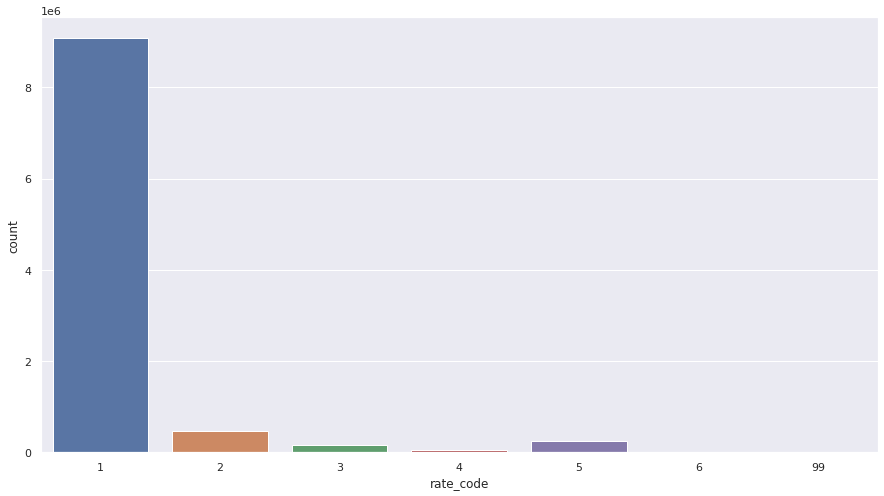

In [91]:
sns.set(rc={'figure.figsize':(15,8)})
sns.countplot(x='rate_code',  data=trip_df)

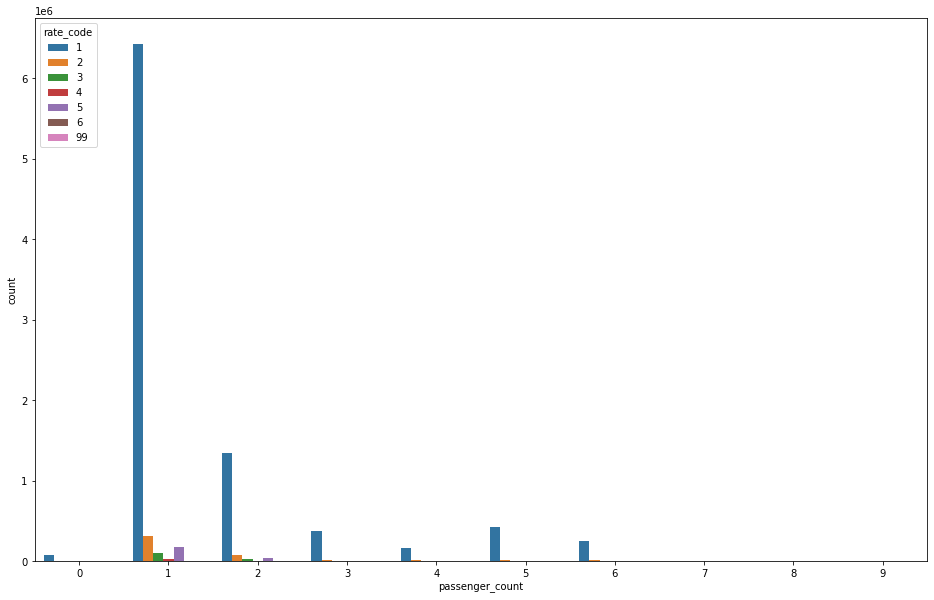

In [87]:
from matplotlib import pyplot

fig, ax = pyplot.subplots(figsize=(16,10))
sns.countplot(x='passenger_count', hue='rate_code', data=trip_df)


In [86]:
trip_df.rate_code.value_counts()

1     9080244
2      467891
5      244836
3      161534
4       44079
99       1105
6         311
Name: rate_code, dtype: int64

In [90]:
trip_df.passenger_count.value_counts()

1    7060027
2    1507882
5     459585
3     417031
6     270380
4     194565
0      90004
7        207
8        175
9        144
Name: passenger_count, dtype: int64

단체 탑승한 사람들의 수보다 단체 탑승객 요금을 받은 사람들이 더 적다?
기사 맘대로구만..

- zone.csv 살펴보기

In [92]:
zone_df

,zone_id,zone_name,borough,zone_geom
0,1,Newark Airport,EWR,"POLYGON((-74.1856319999999 40.6916479999999, -..."
1,3,Allerton/Pelham Gardens,Bronx,"POLYGON((-73.848596761 40.8716707849999, -73.8..."
2,18,Bedford Park,Bronx,"POLYGON((-73.8844286139999 40.8668003789999, -..."
3,20,Belmont,Bronx,"POLYGON((-73.8839239579998 40.8644177609999, -..."
4,31,Bronx Park,Bronx,"POLYGON((-73.8710017319999 40.8572767429999, -..."
...,...,...,...,...
258,206,Saint George/New Brighton,Staten Island,"POLYGON((-74.0825658580711 40.6483158193535, -..."
259,214,South Beach/Dongan Hills,Staten Island,"POLYGON((-74.085787808 40.5958840799999, -74.0..."
260,221,Stapleton,Staten Island,"POLYGON((-74.076017768 40.6377481049999, -74.0..."
261,245,West Brighton,Staten Island,"POLYGON((-74.0992883379999 40.640204723, -74.0..."


In [93]:
zone_df['zone_name'].unique()

array(['Newark Airport', 'Allerton/Pelham Gardens', 'Bedford Park',
       'Belmont', 'Bronx Park', 'Bronxdale', 'City Island',
       'Claremont/Bathgate', 'Co-Op City', 'Country Club', 'Crotona Park',
       'Crotona Park East', 'East Concourse/Concourse Village',
       'East Tremont', 'Eastchester', 'Fordham South', 'Highbridge',
       'Hunts Point', 'Kingsbridge Heights', 'Longwood', 'Melrose South',
       'Morrisania/Melrose', 'Mott Haven/Port Morris', 'Mount Hope',
       'Norwood', 'Parkchester', 'Pelham Bay', 'Pelham Bay Park',
       'Pelham Parkway', 'Rikers Island',
       'Riverdale/North Riverdale/Fieldston',
       'Schuylerville/Edgewater Park', 'Soundview/Bruckner',
       'Soundview/Castle Hill', 'Spuyten Duyvil/Kingsbridge',
       'University Heights/Morris Heights', 'Van Cortlandt Park',
       'Van Cortlandt Village', 'Van Nest/Morris Park', 'West Concourse',
       'West Farms/Bronx River', 'Westchester Village/Unionport',
       'Williamsbridge/Olinville', 'Wo

In [95]:
zone_df['borough'].value_counts()

Queens           69
Manhattan        69
Brooklyn         61
Bronx            43
Staten Island    20
EWR               1
Name: borough, dtype: int64

zone-gem은 zone id가 있으니 삭제

In [96]:
zone_df.drop(columns='zone_geom', axis=1)

,zone_id,zone_name,borough
0,1,Newark Airport,EWR
1,3,Allerton/Pelham Gardens,Bronx
2,18,Bedford Park,Bronx
3,20,Belmont,Bronx
4,31,Bronx Park,Bronx
...,...,...,...
258,206,Saint George/New Brighton,Staten Island
259,214,South Beach/Dongan Hills,Staten Island
260,221,Stapleton,Staten Island
261,245,West Brighton,Staten Island


- zone.csv랑 trip.csv 합치기